In [1]:
# import community
import numpy as np
import networkx as nx
import matplotlib as mpl
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import graphviz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random
import pydoc

# from ds import McmcTree as Tree
from new_ds import McmcTree
from utils import ColorPrint as _

import sys
from datasets.synthetic.generator import TreeGenerator
from datasets.synthetic.new_generator import TreeGenerator

In [2]:
font = {'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)

save_dir = '../tmp/'

In [3]:
N, M = 20, 10
ZETA=1
Gamma=0.15
alpha=0.01
beta=0.01
MR=0.01

generator = TreeGenerator(
    M,
    N,
    ZETA=ZETA,
    Gamma=Gamma,
    alpha=alpha,
    beta=beta,
    MR=MR,
    save_dir=save_dir,
)

tree_obj = generator.generate()

## Plot the generated data

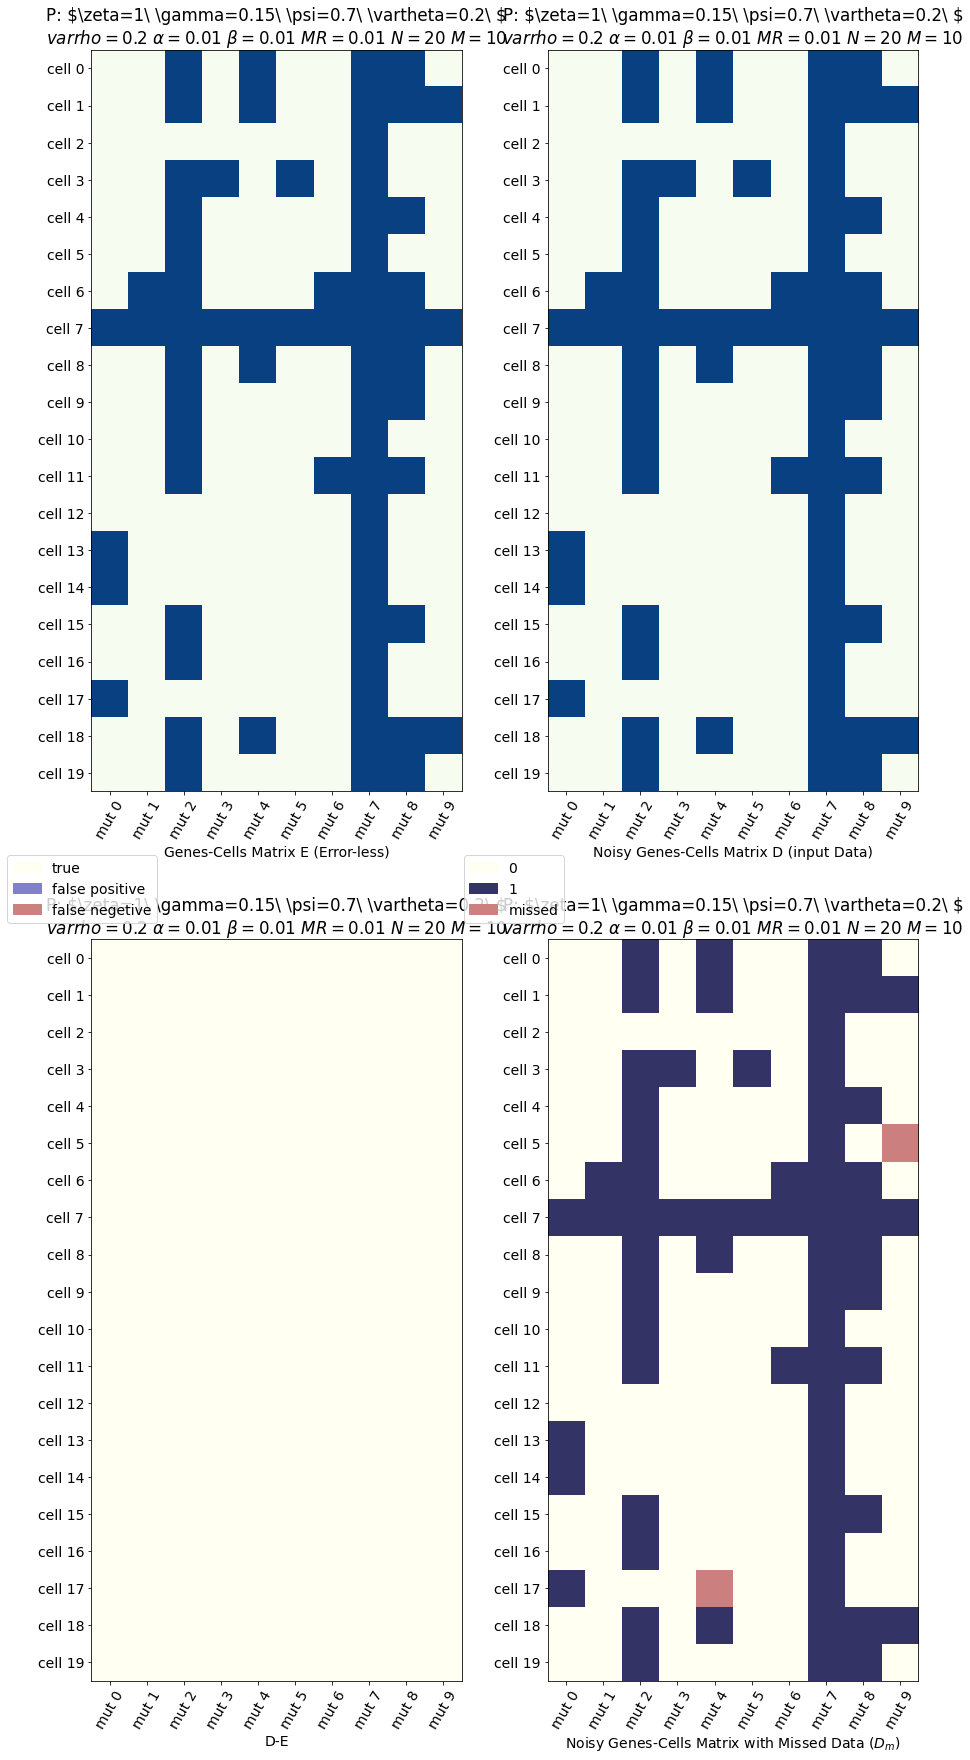

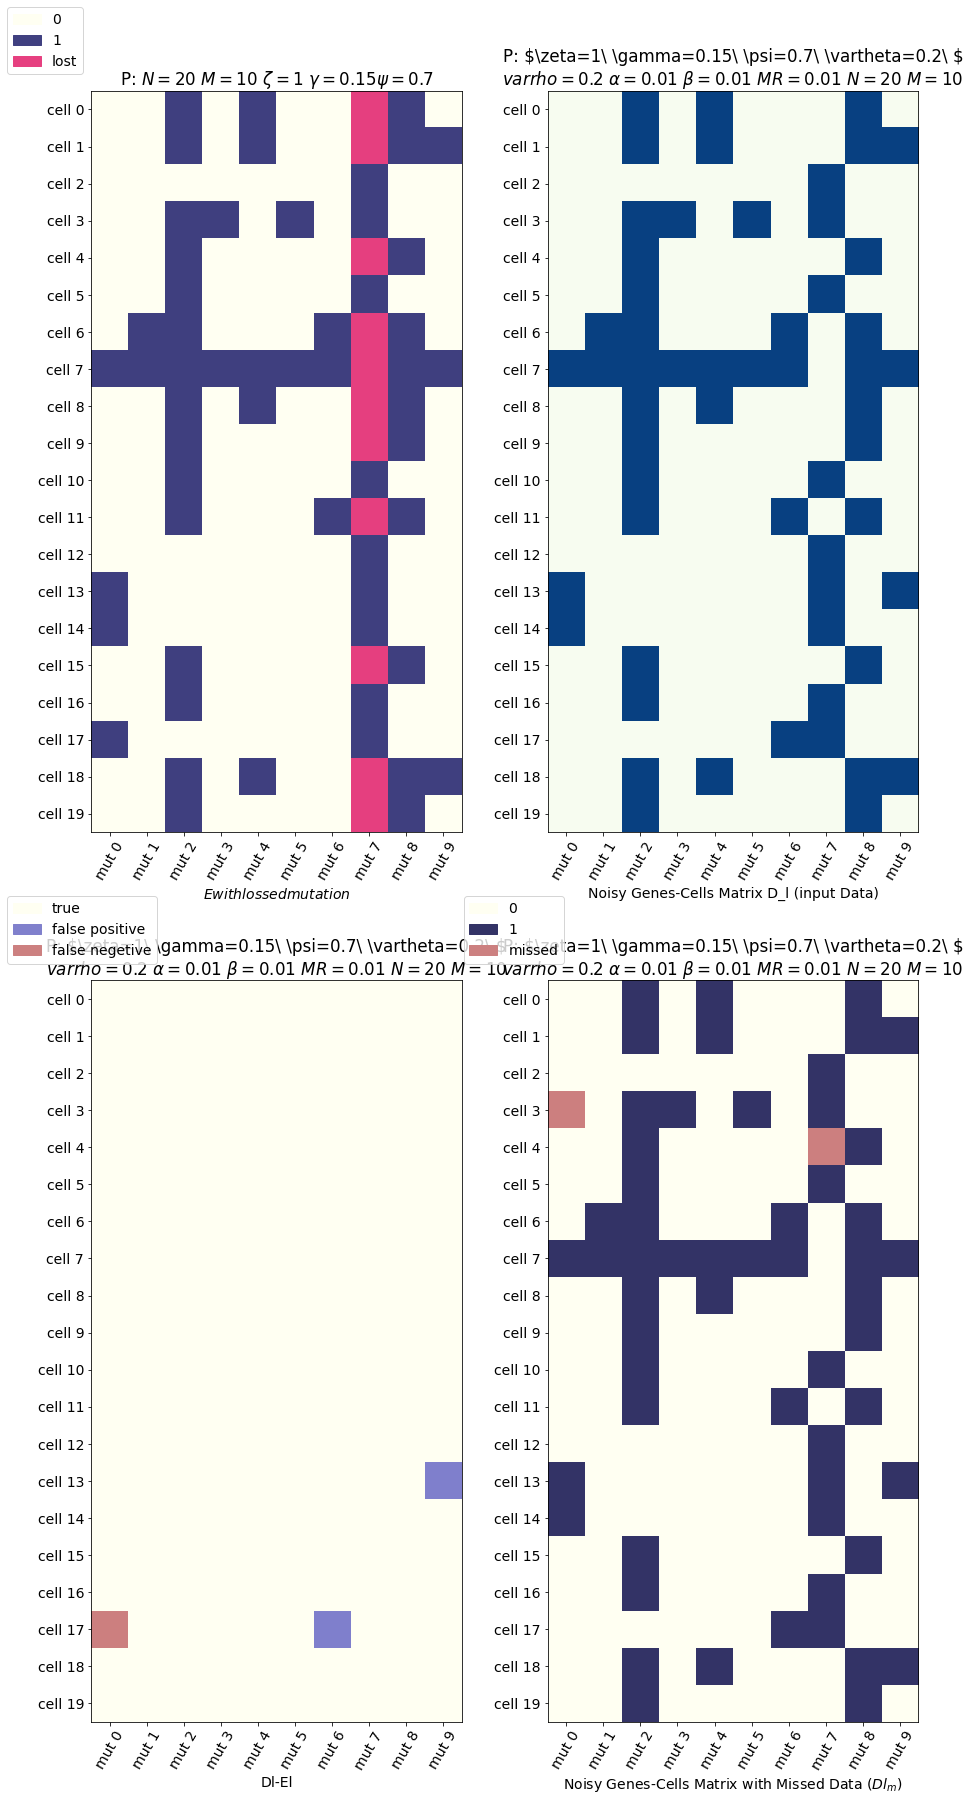

In [4]:
tree_obj.plot_all_mat()

Plot the groud-truth tree

In [5]:
tree_obj.plot_tree_full(save_dir, title="Ground-truth tree with attached samples")

Ground-truth tree with attached samples


## Getting required data to start MCMC

In [6]:
gt_E, gt_D, D, CNP, gt_T = tree_obj.get_mcmc_tree_data()
gt_E, gt_D, D = gt_E.T, gt_D.T, D.T,

gensNames = list( str(i) for i in range(M) )
print("GenesNames:\n\t"+'\n\t'.join(gensNames))

C_num = D.shape[1]
G_num = D.shape[0]
_.print_warn( 'There is {} cells and {} mutations at {} genes in this dataset.'.format(C_num, G_num, len(gensNames)) )

GenesNames:
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9


There is 20 cells and 10 mutations at 10 genes in this dataset.


## Run MCMC

### Fill missed data

In [7]:
### fill missed data
def tf(m,c):
    os = len(np.where(D[:,c]==1.))*1.
    zs = len(np.where(D[:,c]==0.))*1.
    return 1. if np.random.rand() < os/(os+zs) else 0.

for m in range(G_num):
    for c in range(C_num):
        if D[m,c] == 3.:
            D[m,c] = tf(m,c)

In [8]:
dl = list(d for d in D)
root = [n for n,d in gt_T.in_degree() if d==0][0]
print('ROOT:', root)
T = McmcTree(
    gensNames, 
    D, 
    data_list=dl, 
    root=str(root), 
    alpha=alpha, beta=beta, 
    save_dir="../tmp"
)

ROOT: 7


## Set GT data to evalute the inferenced tree

In [9]:
T.set_ground_truth(gt_D, gt_E, gt_T=gt_T)

0 [data="[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]"]
1 [data="[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]"]
2 [data="[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.]"]
3 [data="[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]"]
4 [data="[1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]"]
5 [data="[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]"]
6 [data="[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]"]
7 [data="[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]"]
8 [data="[1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]"]
9 [data="[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]"]
"13|-0.1"
"14|-0.1"
"17|-0.1"
"6|-13.9"
"3|-9.3"
"10|-0.1"
"16|-0.1"
"7|-23.1"
"11|-9.3"
"2|-0.1"
"12|-0.1"
"0|-0.1"
"1|-4.7"
"4|-4.7"
"8|-0.1"
"9|-4.7"
"15|-4.7"
"18|-4.7"
"19|-4.7"
"5|-4.7"


NameError: name 'jks' is not defined

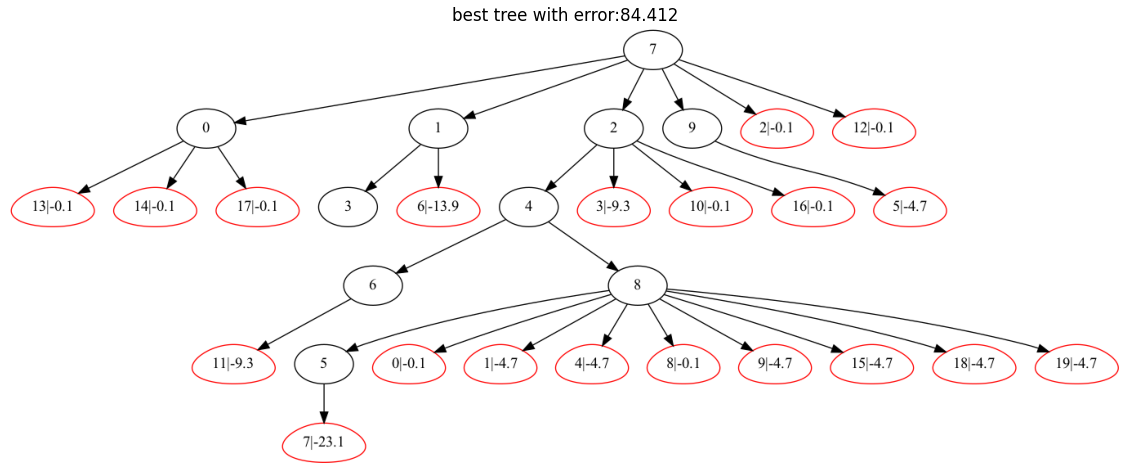

In [10]:
# T.plot_tree_full('../tmp/', title="Ground-truth tree with attached samples")

T.randomize()
# hkebs
T.plot_best_T('initial T')
jks
# T.plot('T0')

In [ ]:
# T.randomize()
# T.plot_best_T('initial T')
# T.plot('T0')

T.set_rho(30)

for i in range(100):
    if T.next():
        break

In [ ]:
T.plot_all_results()
img = mpimg.imread('./benchmark.png')
plt.figure(figsize=(30,40))
plt.imshow(img)
plt.title('Benchmark')
plt.axis('off')

In [ ]:
run_data = T.run_data
rd = np.array(run_data)
errors = T.get_errors()

In [ ]:
rd

In [ ]:
plt.plot(errors, 'r', label='Accepted Error') # accepted errors
plt.plot(rd[:, -2], 'k', label='Random Error') # random errors
# plt.plot(self.enrgs) # best errors
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Changing energy after {} step'.format(5000))
# if filename:
#     plt.savefig(filename)
plt.show()

In [ ]:
new_acc_errors = []
new_random_errors = []
for i, t in enumerate(rd):
    rnd = np.random.rand()
    if t[-1] > rnd/10000:
        new_acc_errors.append(errors[i])
        new_random_errors.append(t[-2])

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(new_acc_errors[1:], 'r', label='Accepted Error') # accepted errors
plt.plot(new_random_errors, 'k', label='Random Error') # random errors
# plt.plot(self.enrgs) # best errors
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Changing loss after {} step'.format(len(new_random_errors)))
# if filename:
#     plt.savefig(filename)
plt.show()

In [ ]:
T.plot_all_results(plot_pm=True)

In [ ]:
# T.plot_all_results()

In [ ]:
D = T.D

In [ ]:
np.unique(D)

In [ ]:
# D
M = D.shape[0]
N = D.shape[1]
plt.figure(figsize=(M*0.5,N*0.5))
# plt.imshow(D.T-1, cmap='GnBu', interpolation="nearest")

t=1
cmap = {0:[1,1,0.95,t], 1:[0.3,0.3,0.6,t], 3:[0.5,0.5,0.8,t/3]}
labels = {0:'0', 1:'1', 3:'missed'}
arrayShow = np.array([[cmap[i] for i in j] for j in D.T])    
## create patches as legend
patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]
plt.imshow(arrayShow, interpolation="nearest")
plt.legend(handles=patches, loc=2, borderaxespad=-6)

plt.yticks(range(D.shape[1]), ['cell %d'%i for i in range(N)])
plt.xticks(range(D.shape[0]), [ 'mut %d'%i for i in range(M)])
plt.xticks(rotation=60)
plt.title("Noisy Genes-Cells Matrix D (input Data)")
# file_path = '{}D_{}.png'.format('./', str_params)
# plt.savefig(file_path)
plt.show()

In [ ]:
D.shape